In [173]:
pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [174]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE/Crypto/crypto_market_data.csv",index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [178]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [179]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [180]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_market_data.to_numpy())

In [181]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_features, columns=[
  'price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d', 'price_change_percentage_60d',
   'price_change_percentage_200d','price_change_percentage_1y'])
 
print("Scaled Dataset Using StandardScaler")

# Display sample data
df_scaled.head()

Scaled Dataset Using StandardScaler


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.795492,0.511302,0.583375,0.241469,0.155180,0.037656,0.007000
1,0.748674,0.615021,0.541708,0.198501,0.119205,0.083994,0.015188
2,0.724956,0.229343,0.428446,0.197509,0.168365,0.000174,0.002235
3,0.715894,0.204758,0.481360,0.199087,0.101797,0.017920,0.000123
4,0.894683,0.865714,0.776267,0.287488,0.116111,0.009896,0.004074


### Find the Best Value for k Using the Original Data.

In [182]:
# Create a list with the number of k-values from 1 to 11
kmeans11 = KMeans(n_clusters=11)
kmeans11

KMeans(n_clusters=11)

In [183]:
import glob
import csv
import os
# Create an empty list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

km = range(1, 11)
inertias = []
for k in km:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    inertias.append(model.inertia_)

In [184]:
# Create a dictionary with the data to plot the Elbow curve
from sklearn.datasets import make_blobs
dic = model.inertia_
dic = {}
for key, val in dic.items():
  dic[km] = sum(np.min(cdist(df_scaled, model.cluster_centers_,'euclidean'), axis=1)) / df_scaled.shape[0]
  print(f'{key} : {val}')

# Create a DataFrame with the data to plot the Elbow curve
dt = []
K = range(1,11)
for k in km:
    dt.append(sum(np.min(cdist(df_scaled, model.cluster_centers_,'euclidean'), axis=1)) / df_scaled.shape[0])

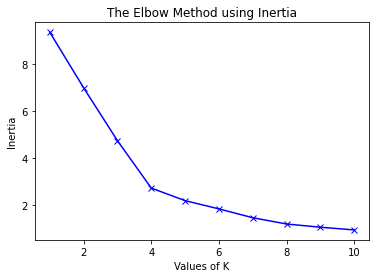

In [185]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

plt.plot(km, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Data

In [186]:
# Initialize the K-Means model using the best value for k
k = 4

In [187]:
# Fit the K-Means model using the scaled data
model4 = KMeans(k)
model4.fit(df_scaled)

KMeans(n_clusters=4)

In [188]:
# Predict the clusters to group the cryptocurrencies using the scaled data
df = model4.fit_predict(df_scaled)
# Print the resulting array of cluster values.
print(df)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [189]:
# Create a copy of the DataFrame
df2 = df.copy()
df2

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [190]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled['pre_scaled'] = [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0]
# Display sample data
print(df_scaled['pre_scaled'])

0     1
1     1
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    1
14    0
15    1
16    0
17    0
18    1
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    1
29    0
30    0
31    0
32    2
33    1
34    0
35    0
36    3
37    0
38    0
39    0
40    0
Name: pre_scaled, dtype: int64


In [206]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import hvplot.pandas
plt = df_scaled.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', width=400)
plt

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

### Optimize Clusters with Principal Component Analysis.

In [192]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)


In [193]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

df_pca = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
df3 = pd.DataFrame(df_pca)
df3.head(5)

,0,1,2
0,0.556043,-0.192413,-0.000851
1,0.566173,-0.193865,-0.120174
2,-0.461711,0.014318,0.113497
3,-0.460807,0.007979,0.098913
4,0.644379,-0.514179,-0.083846


In [194]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

exp_var_pca = pca.explained_variance_ratio_
exp_var_pca




array([0.75278626, 0.11926649, 0.07594254])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** [0.75278626, 0.11926649, 0.07594254]

In [195]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data

# Set the coinid column as index
# Display sample data

df4 = pd.DataFrame(df_pca)
df4.head()

,0,1,2
0,0.556043,-0.192413,-0.000851
1,0.566173,-0.193865,-0.120174
2,-0.461711,0.014318,0.113497
3,-0.460807,0.007979,0.098913
4,0.644379,-0.514179,-0.083846


### Find the Best Value for k Using the PCA Data

In [196]:
# Create a list with the number of k-values from 1 to 11
k11 = KMeans(n_clusters=11)
k11

KMeans(n_clusters=11)

In [197]:
# Create an empy list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


Kpca = range(1, 11)
iner = []
for k in Kpca:
    model = KMeans(n_clusters=k)
    model.fit(df4)
    iner.append(model.inertia_)

In [198]:
# Create a dictionary with the data to plot the Elbow curve
from sklearn.datasets import make_blobs
dicPca = model.inertia_
dicPca = {}
for key, val in dicPca.items():
  dicPca[Kpca] = sum(np.min(cdist(df4, model.cluster_centers_,'euclidean'), axis=1)) / df4.shape[0]
  print(f'{key} : {val}')

# Create a DataFrame with the data to plot the Elbow curve
dtPca = []
for k in Kpca:
    dtPca.append(sum(np.min(cdist(df4, model.cluster_centers_,'euclidean'), axis=1)) / df4.shape[0])

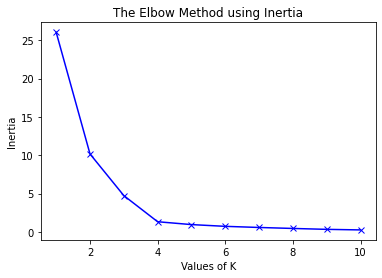

In [199]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

plt.plot(Kpca, iner, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**   No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [200]:
# Initialize the K-Means model using the best value for k
kpca = 4

In [201]:
# Fit the K-Means model using the PCA data
model4 = KMeans(kpca)
model4.fit(df4)

KMeans(n_clusters=4)

In [202]:
# Predict the clusters to group the cryptocurrencies using the PCA data
dfPca = model4.fit_predict(df4)
# Print the resulting array of cluster values.
print(dfPca)


[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [226]:
# Create a copy of the DataFrame with the PCA data

df_pc = dfPca.copy()
df_pc

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [240]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled['pre_Pca'] = [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0]
# Display sample data
print(df_scaled['pre_Pca'])

0     1
1     1
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    1
14    0
15    1
16    0
17    0
18    1
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    1
29    0
30    0
31    0
32    2
33    1
34    0
35    0
36    3
37    0
38    0
39    0
40    0
Name: pre_Pca, dtype: int64


In [242]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import hvplot.pandas
plt2 = df_scaled.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', width=400)
plt2

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 